In [165]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import LogisticRegression


In [166]:
df_pandas = pd.read_csv('udemy_courses.csv')

In [167]:
df_pandas.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [168]:
df_pandas.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [169]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [170]:
df_pandas.drop(['course_id','published_timestamp','url'],axis=1,inplace=True)

In [171]:
df_pandas.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance


In [172]:
df_pandas[df_pandas.duplicated()]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
787,Essentials of money value: Get a financial Life !,True,20,0,0,20,All Levels,0.616667,Business Finance
788,Introduction to Forex Trading Business For Beg...,True,20,0,0,27,Beginner Level,1.500000,Business Finance
894,Understanding Financial Statements,True,25,0,0,10,All Levels,1.000000,Business Finance
1100,CFA Level 2- Quantitative Methods,True,40,0,0,35,All Levels,5.500000,Business Finance
1473,MicroStation - Células,True,20,0,0,9,Beginner Level,0.616667,Graphic Design
2561,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4.000000,Web Development


In [173]:
df_pandas.drop_duplicates(inplace=True)

In [174]:
df_pandas[df_pandas.duplicated()]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject


C:\Users\carlos\AppData\Local\Temp\ipykernel_33412\2365349361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_paid', data=df_pandas, palette='coolwarm')


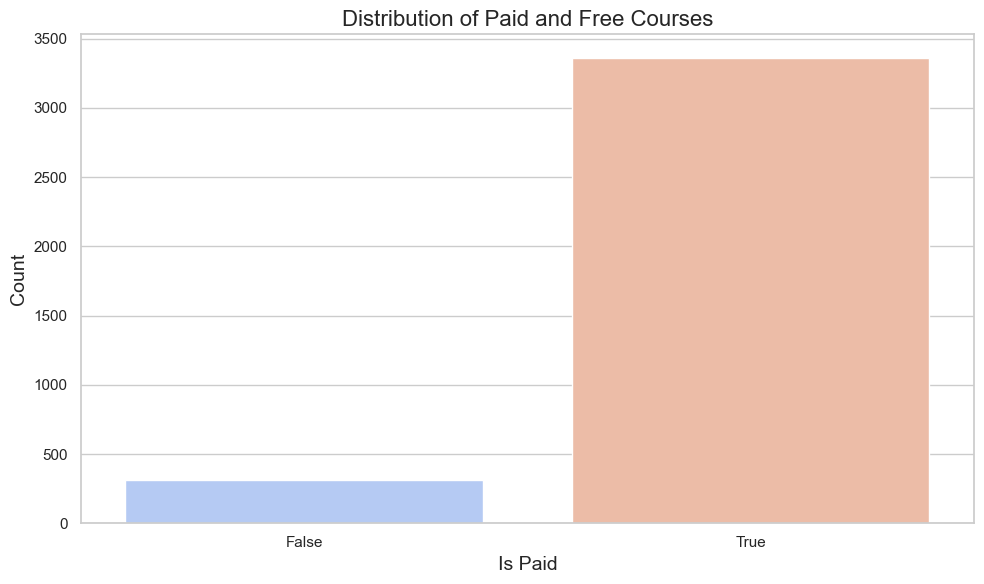

subject              is_paid
Business Finance     True       1095
Web Development      True       1066
Musical Instruments  True        634
Graphic Design       True        567
Web Development      False       133
Business Finance     False        96
Musical Instruments  False        46
Graphic Design       False        35
Name: count, dtype: int64

In [175]:

plt.figure(figsize=(10, 6))
plt.title("Distribution of Paid and Free Courses", fontsize=16)
sns.countplot(x='is_paid', data=df_pandas, palette='coolwarm')
plt.xlabel("Is Paid", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()
df_pandas[['subject', 'is_paid',]].value_counts()

In [176]:
df_pandas.sort_values(by='price', ascending=False).head(5)[['course_title','subject', 'price']]

,course_title,subject,price
0,Ultimate Investment Banking Course,Business Finance,200
3409,Complete Login and Registration System in PHP ...,Web Development,200
2653,"Learn to code, Become a Web Developer and Mast...",Web Development,200
2651,HTML and HTML5 For Beginners 2016,Web Development,200
304,Situational Trading: Proven Option Strategy fo...,Business Finance,200


In [177]:
df_pandas['earnings']=df_pandas['price']*df_pandas['num_subscribers']
df_pandas.head(5)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,earnings
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance,429400
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance,209400
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,97830
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance,232845
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,255200


Text(0.5, 1.0, 'Content Duration vs Num Subscribers')

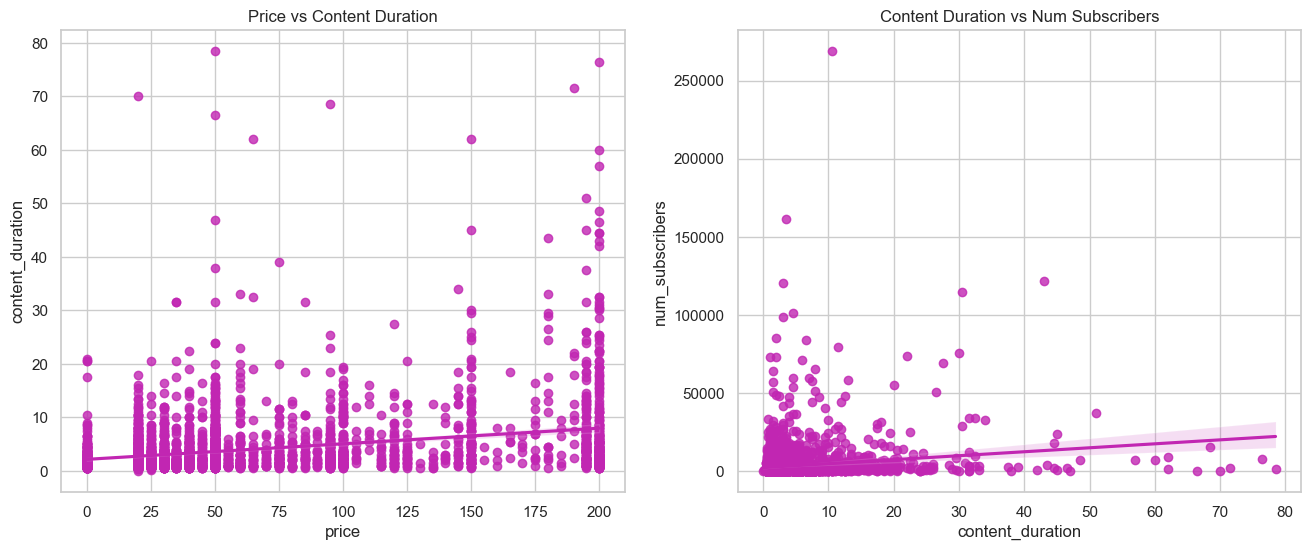

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.regplot(x='price', y='content_duration', color='#C126B2', data=df_pandas, ax=axes[0])
axes[0].set_title('Price vs Content Duration')

sns.regplot(x='content_duration', y='num_subscribers', color='#C126B2', data=df_pandas, ax=axes[1])
axes[1].set_title('Content Duration vs Num Subscribers')

<Axes: xlabel='subject', ylabel='earnings'>

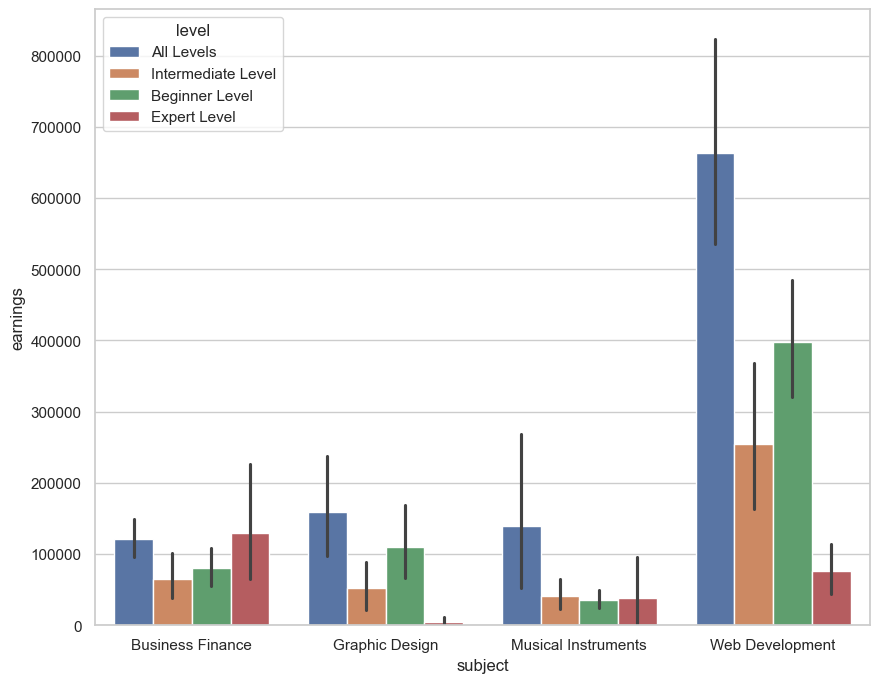

In [179]:
plt.figure(figsize=(10,8))
sns.barplot(x='subject',y='earnings',hue='level',data=df_pandas)

In [180]:
   
spark = SparkSession.builder \
    .appName("Pandas to Spark with Arrow") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .getOrCreate()

In [181]:
type(df_pandas)

pandas.core.frame.DataFrame

In [182]:
df_new_pyspark = spark.createDataFrame(df_pandas)
type(df_new_pyspark)

pyspark.sql.dataframe.DataFrame

In [183]:
df_new_pyspark.show()

+--------------------+-------+-----+---------------+-----------+------------+------------------+------------------+----------------+--------+
|        course_title|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|  content_duration|         subject|earnings|
+--------------------+-------+-----+---------------+-----------+------------+------------------+------------------+----------------+--------+
|Ultimate Investme...|   true|  200|           2147|         23|          51|        All Levels|               1.5|Business Finance|  429400|
|Complete GST Cour...|   true|   75|           2792|        923|         274|        All Levels|              39.0|Business Finance|  209400|
|Financial Modelin...|   true|   45|           2174|         74|          51|Intermediate Level|               2.5|Business Finance|   97830|
|Beginner to Pro -...|   true|   95|           2451|         11|          36|        All Levels|               3.0|Business Finance|  232845|
|How T

In [184]:
df_new_pyspark.groupBy('subject').count().show()

+-------------------+-----+
|            subject|count|
+-------------------+-----+
|   Business Finance| 1191|
|     Graphic Design|  602|
|Musical Instruments|  680|
|    Web Development| 1199|
+-------------------+-----+



In [185]:
tokenizer = Tokenizer(inputCol='course_title',outputCol='mytokens')
stopwords_remover = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')

In [186]:
labelEncoder = StringIndexer(inputCols=['subject','level'],outputCols=['subject_indexer','level_indexer']).fit(df_new_pyspark)
df = labelEncoder.transform(df_new_pyspark)

In [187]:
df.show(5)

+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+----------------+--------+---------------+-------------+
|        course_title|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration|         subject|earnings|subject_indexer|level_indexer|
+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+----------------+--------+---------------+-------------+
|Ultimate Investme...|   true|  200|           2147|         23|          51|        All Levels|             1.5|Business Finance|  429400|            1.0|          0.0|
|Complete GST Cour...|   true|   75|           2792|        923|         274|        All Levels|            39.0|Business Finance|  209400|            1.0|          0.0|
|Financial Modelin...|   true|   45|           2174|         74|          51|Intermediate Level|             2.5|Business Finance|   97830|           

In [188]:
labelEncoder.labelsArray

[('Web Development',
  'Business Finance',
  'Musical Instruments',
  'Graphic Design'),
 ('All Levels', 'Beginner Level', 'Intermediate Level', 'Expert Level')]

In [189]:
df.printSchema()

root
 |-- course_title: string (nullable = true)
 |-- is_paid: boolean (nullable = true)
 |-- price: long (nullable = true)
 |-- num_subscribers: long (nullable = true)
 |-- num_reviews: long (nullable = true)
 |-- num_lectures: long (nullable = true)
 |-- level: string (nullable = true)
 |-- content_duration: double (nullable = true)
 |-- subject: string (nullable = true)
 |-- earnings: long (nullable = true)
 |-- subject_indexer: double (nullable = false)
 |-- level_indexer: double (nullable = false)



In [190]:
df = df.select('course_title', 'level_indexer','subject','subject_indexer')

In [191]:
df.show(5)

+--------------------+-------------+----------------+---------------+
|        course_title|level_indexer|         subject|subject_indexer|
+--------------------+-------------+----------------+---------------+
|Ultimate Investme...|          0.0|Business Finance|            1.0|
|Complete GST Cour...|          0.0|Business Finance|            1.0|
|Financial Modelin...|          2.0|Business Finance|            1.0|
|Beginner to Pro -...|          0.0|Business Finance|            1.0|
|How To Maximize Y...|          2.0|Business Finance|            1.0|
+--------------------+-------------+----------------+---------------+
only showing top 5 rows



In [192]:
train ,test = df.randomSplit((0.7,0.3),seed=45)

In [193]:
train.count()

2559

In [194]:
lr = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='subject_indexer')

In [195]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,lr])

In [196]:
pipeline

Pipeline_b2d03833a6f5

In [197]:
lr_model = pipeline.fit(train)

In [198]:
lr_model

PipelineModel_f90ef7284b23

In [199]:
predictions = lr_model.transform(test)

In [200]:
predictions.show(40)

+--------------------+-------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        course_title|level_indexer|         subject|subject_indexer|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+-------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|61% Profit In 1 M...|          0.0|Business Finance|            1.0|[61%, profit, in,...|[61%, profit, 1, ...|(3682,[0,2,13,51,...|(3682,[0,2,13,51,...|[-9.2520428010111...|[6.86676525311218...|       1.0|
|A Beginner's Guid...|          2.0|Business Finance|            1.0|[a, beginner's, g...|[beginner's, guid...|(3682,[19,190,300...|(3682,[19,190,300...|[-0.2544439713107..